<a href="https://colab.research.google.com/github/Mayuri172-atole/DeepLearning/blob/main/Hindi_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Hindi-Digits-Classification

In [ ]:
!apt-get install -y unrar
rar_path = "/content/numerals.rar"
extract_dir = "/content/numerals"
import os
os.makedirs(extract_dir, exist_ok=True)

!unrar x "{rar_path}" "{extract_dir}/"

print("Files extracted to:", extract_dir)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/numerals.rar


Would you like to replace the existing file /content/numerals/numerals/n_0/001_01.jpg
   511 bytes, modified on 2024-09-06 01:17
with a new one
   511 bytes, modified on 2024-09-06 01:17

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Quit

Program aborted
Files extracted to: /content/numerals


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_path = '/content/numerals/numerals'

character_folders = sorted(os.listdir(data_path))

label_mapping = {folder: idx for idx, folder in enumerate(character_folders)}
print("Label mapping:", label_mapping)

image_data = []
image_labels = []

for label_name, label_idx in label_mapping.items():
    folder_path = os.path.join(data_path, label_name)
    image_files = sorted(os.listdir(folder_path))[:200]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        image_data.append(img.flatten())
        image_labels.append(label_idx)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

df = pd.DataFrame(image_data)
df['label'] = image_labels

print("DataFrame shape:", df.shape)
print(df.head())

Label mapping: {'n_0': 0, 'n_1': 1, 'n_2': 2, 'n_3': 3, 'n_4': 4, 'n_5': 5, 'n_6': 6, 'n_7': 7, 'n_8': 8, 'n_9': 9}
DataFrame shape: (2000, 1025)
     0    1    2    3    4    5    6    7    8    9  ...  1015  1016  1017  \
0  253  250  250  253  255  253  249  251  246  243  ...   249   254   255   
1  253  254  253  246  247  255  253  247  251  254  ...   248   241   252   
2  254  248  252  251  251  251  245  253  253  254  ...   252   255   255   
3  255  234  247  255  248  244  254  255  255  255  ...   246   254   255   
4  255  250  250  253  254  253  252  255  255  251  ...   251   255   255   

   1018  1019  1020  1021  1022  1023  label  
0   252   253   254   254   254   254      0  
1   255   255   255   255   255   255      0  
2   255   255   255   255   255   255      0  
3   252   253   255   255   255   255      0  
4   248   249   253   254   254   254      0  

[5 rows x 1025 columns]


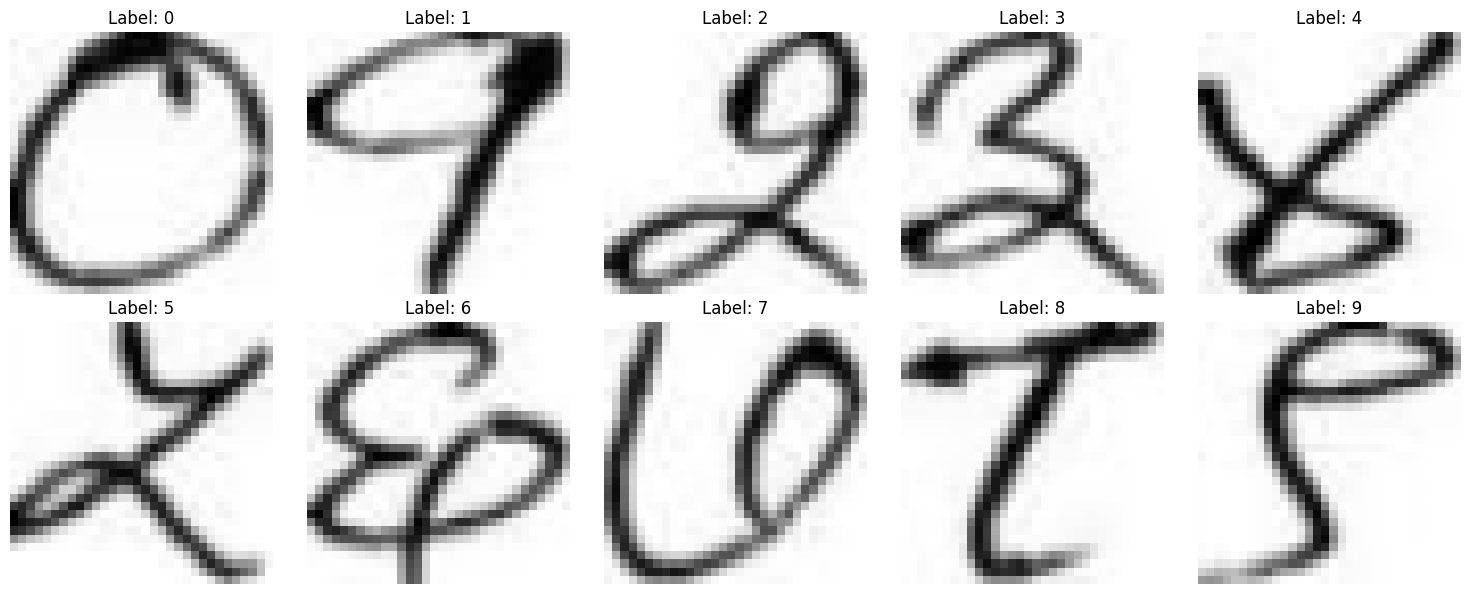

In [ ]:
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()

for idx, (label, group) in enumerate(df.groupby('label')):
    img_data = group.iloc[0, :-1]
    img = img_data.values.reshape(32, 32)
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(f'Label: {label}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(image_data).astype('float32') / 255.0
y = np.array(image_labels)

X = X.reshape(-1, 32, 32, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5090 - loss: 1.7157 - val_accuracy: 0.1094 - val_loss: 2.3833
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8447 - loss: 0.4713 - val_accuracy: 0.1094 - val_loss: 2.7980
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9144 - loss: 0.2872 - val_accuracy: 0.1094 - val_loss: 3.4199
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9434 - loss: 0.1791 - val_accuracy: 0.1594 - val_loss: 3.2279
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9640 - loss: 0.1218 - val_accuracy: 0.1125 - val_loss: 3.3018
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.1124 - val_accuracy: 0.2094 - val_loss: 3.2329
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9839 - loss: 0.0790 - val_accuracy: 0.3531 - val_loss: 2.9580
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9787 - loss: 0.0731 - val_accuracy: 0.4719 - val_loss

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6253 - loss: 1.2889
Test accuracy: 0.5875


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


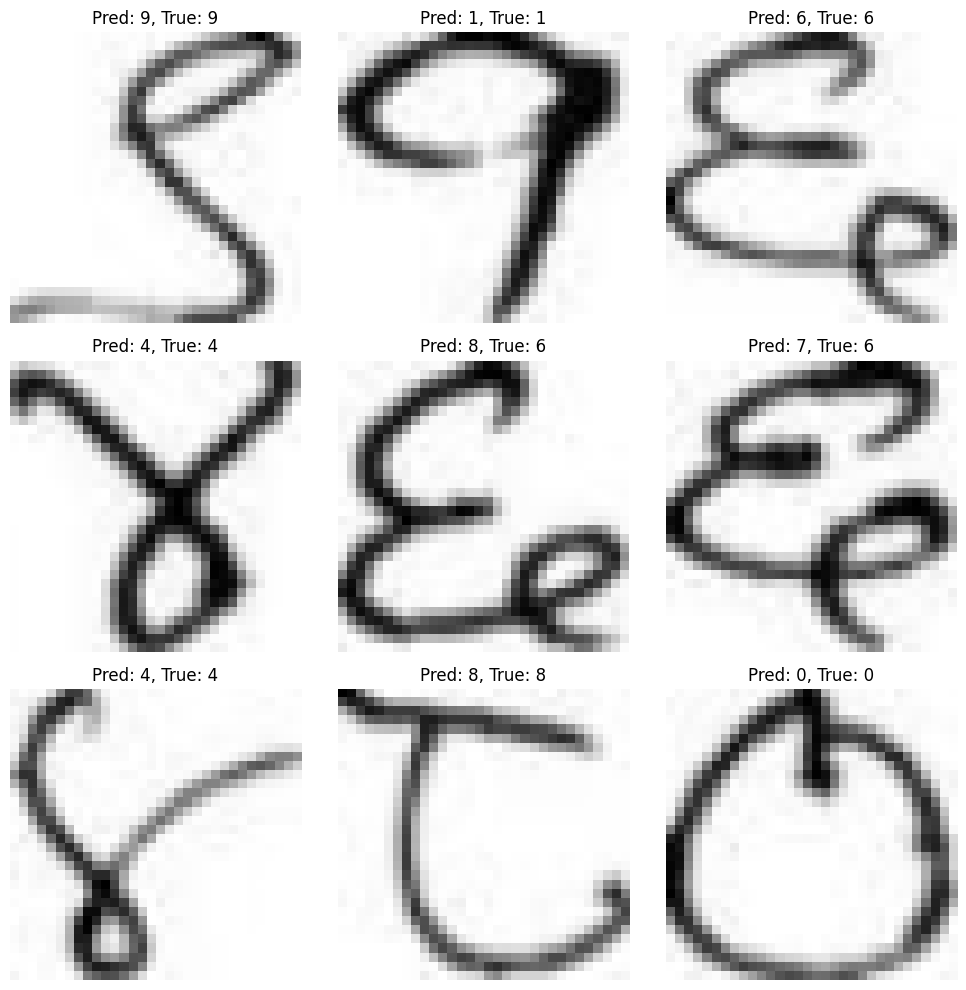

In [ ]:
predictions = model.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()

for i in range(min(len(X_test), rows * cols)):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(32, 32), cmap='gray')
    ax.set_title(f'Pred: {np.argmax(predictions[i])}, True: {y_test[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


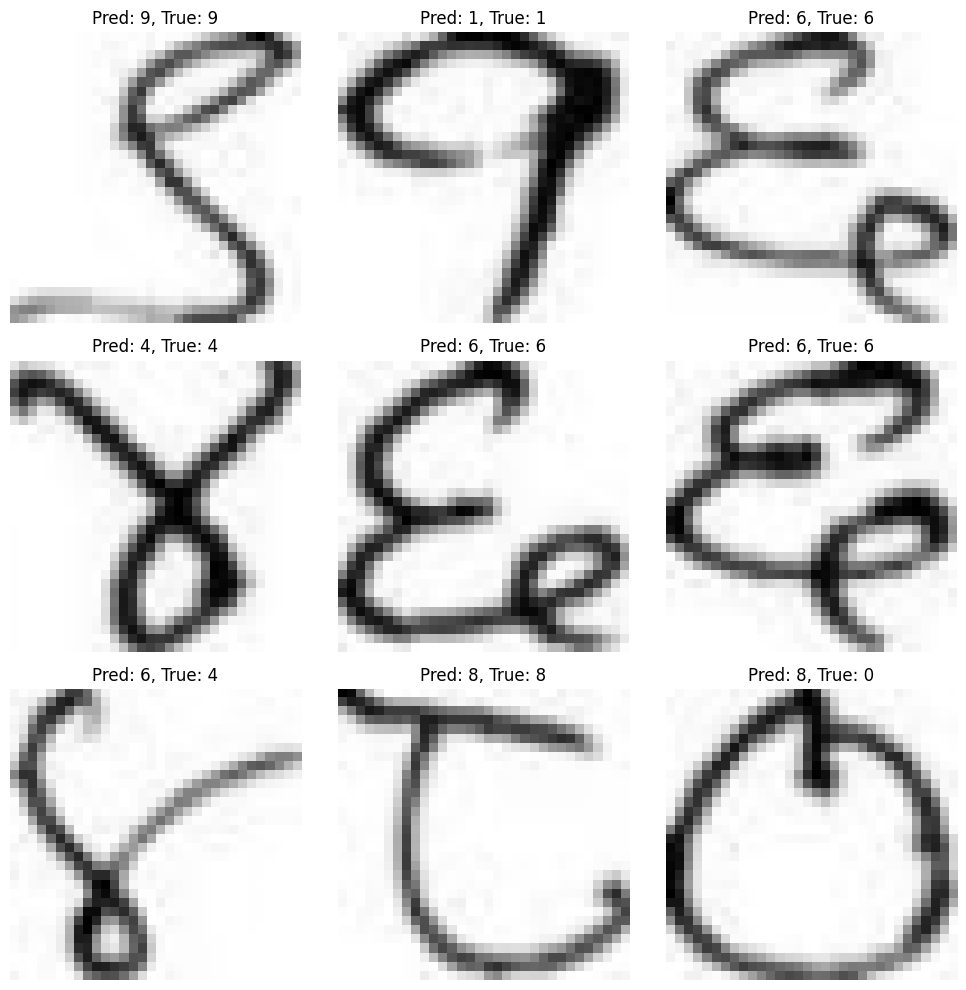

In [ ]:
predictions = model.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()

for i in range(min(len(X_test), rows * cols)):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(32, 32), cmap='gray')
    ax.set_title(f'Pred: {np.argmax(predictions[i])}, True: {y_test[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

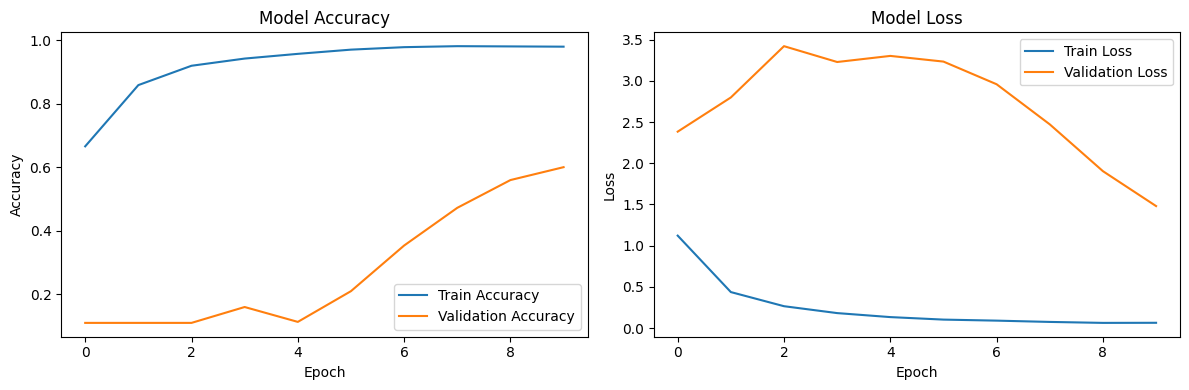

In [ ]:


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



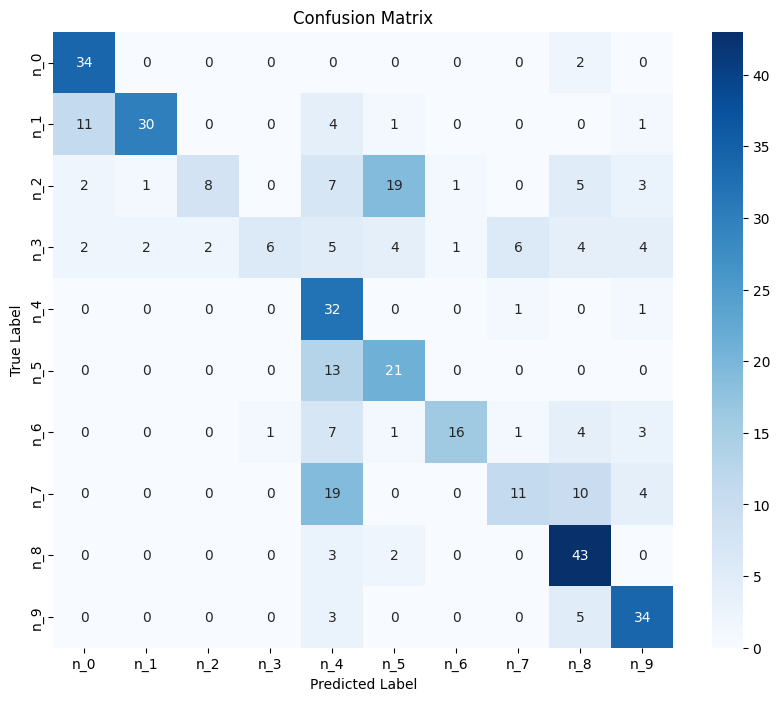

Classification Report:
              precision    recall  f1-score   support

         n_0       0.69      0.94      0.80        36
         n_1       0.91      0.64      0.75        47
         n_2       0.80      0.17      0.29        46
         n_3       0.86      0.17      0.28        36
         n_4       0.34      0.94      0.50        34
         n_5       0.44      0.62      0.51        34
         n_6       0.89      0.48      0.63        33
         n_7       0.58      0.25      0.35        44
         n_8       0.59      0.90      0.71        48
         n_9       0.68      0.81      0.74        42

    accuracy                           0.59       400
   macro avg       0.68      0.59      0.56       400
weighted avg       0.68      0.59      0.56       400



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)